# Dimensionality Reduction - Practical Application    降维 - 实际应用

This notebook is following the progression of the Dimensionality Reduction class. It provides practical illustrations in Python  to understand the notions we have seen in this course.

该笔记本跟踪降维课程的进展。它提供了 Python 中的实用插图来理解我们在本课程中看到的概念。

<div class="alert alert-warning">
Author: Fabrice JIMENEZ
    
Link to course materials: https://github.com/jfabrice/ml-class-dimensionality-reduction
</div>

## Preliminary loading with Google Colab

If you are using this notebook with Google Colab, please execute first the following cells, to retrieve the GitHub repository content, set the working directory and install required dependencies. Otherwise, ignore these 3 cells and move to the next section.

In [ ]:
!git clone https://github.com/jfabrice/ml-class-dimensionality-reduction.git

In [ ]:
import os
os.chdir('ml-class-dimensionality-reduction')

In [ ]:
!pip install -r requirements.txt

## Imports and Loading Dataset

The dataset we will use for this application is the famous MNIST dataset (handwritten digits). We use the CSV version of this dataset available here: https://pjreddie.com/projects/mnist-in-csv/ 

We will keep only the mnist_test.csv file, containing 10 000 gray-scale images of dimension 28 x 28.


我们将用于此应用程序的数据集是著名的 MNIST 数据集（手写数字）。我们使用此处提供的此数据集的 CSV 版本：https://pjreddie.com/projects/mnist-in-csv/ 

我们将只保留 mnist_test.csv 文件，其中包含 10 000 张尺寸为 28 x 28 的灰度图像。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/mnist_test.csv', header=None)
df['pixels'] = df.index.map(lambda x: np.array(df.iloc[x][1:]))
dropcols = df.columns[(df.columns != 0) * (df.columns != 'pixels')]
df.drop(dropcols, axis=1, inplace=True)
df.columns = ['label','pixels']
print(df.shape)

(10000, 2)


In [3]:
df.head()

,label,pixels
0,7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


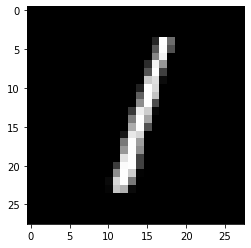

In [4]:
fig = plt.imshow(df['pixels'][2].reshape(28,28), cmap='gray')

## Dimensionality reduction 降维

In this section we will think about how to distinguish the characteristics of different handwritten digits, starting only from the raw values of the pixels as features.

Let's consider 3 digits. Keep them as they are for the moment, you will have time at the end to play with these parameters.

在本节中，我们将考虑如何区分不同手写数字的特征，仅从像素的原始值作为特征开始。

让我们考虑 3 位数字。暂时保持原样，您将有时间在最后使用这些参数。

In [5]:
## Digits considered here ##
labels = [1,6,8]
colors = ['red', 'blue', 'green']

X = np.array([df['pixels'][i] for i in df.index if df['label'][i] in labels])
y = np.array([df['label'][i] for i in df.index if df['label'][i] in labels])

print('X shape: '+str(X.shape))
print('y shape: '+str(y.shape))

X shape: (3067, 784)
y shape: (3067,)


We have 28 x 28 = 784 features. It is a high dimension (~ same order of magnitude as the number of points). 我们有 28 x 28 = 784 个特征。它是一个高维度（~与点数的数量级相同）。

<div class="alert alert-warning">
Question: How would you visualize the behavior of the different classes (digits), or find a direction, important features contributing to these classes?
    
问题：您将如何可视化不同类（数字）的行为，或者找到方向，以及对这些类有贡献的重要特征？
</div>

In this case, we cannot rely on univariate analysis: it is quite clear that the value of a given pixel on the image will not determine by itself the number which is written. You need to study the relationship between the pixel values: let's see how the methods to reduce dimensionality we saw during this course can help us distinguish noise, correlation and information patterns!

在这种情况下，我们不能依赖单变量分析：很明显，图像上给定像素的值不会自行决定写入的数字。您需要研究像素值之间的关系：让我们看看我们在本课程中看到的降维方法如何帮助我们区分噪声、相关性和信息模式！

#### Principal Components Analysis: linear approach   主成分分析：线性方法

In [6]:
from sklearn.decomposition import PCA

In [7]:
## Computing the PCA
pca = PCA(n_components=X.shape[1])
XPCA = pca.fit_transform(X)

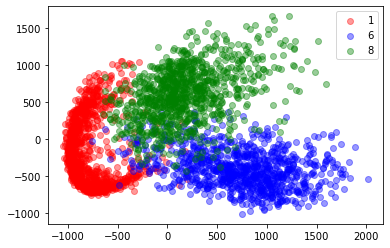

In [8]:
## Choose the axes you want to visualize
component_x = 1
component_y = 2

## Plotting
fig, ax = plt.subplots()
for i in range(len(labels)):
    ax.scatter(XPCA[y == labels[i],component_x-1], XPCA[y == labels[i],component_y-1], c=colors[i], label=labels[i], alpha=0.4)

l = ax.legend()

<div class="alert alert-warning">
Question: Try to visualize different axes and find the ones who allow (or not) to distinguish the classes.
    
问题：尝试可视化不同的轴并找到允许（或不允许）区分类别的轴。
</div>

#### t-distributed Stochastic Neighbor Embedding: non-linear approach  t 分布随机邻居嵌入：非线性方法¶

In [9]:
from sklearn.manifold import TSNE

In [12]:
## Computing the t-SNE 2D projection

## Parameters with real influence on the accuracy
perplexity = 30      #复杂度，越大各个点离得越近，trop ou moins de separer chaque composants
learning_rate = 200
n_iter = 1000

tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter)
XTSNE = tsne.fit_transform(X)

Peut-on revenir sur l’impact du paramètre « perplexité » sur le t-SNE ?

yes: perplexité = écart type de la courbe qui définit la similarité entre points

sur l'exemple de tout à l'heure, on a vu qu'en diminuant la perplexité, on diminue l'écart-type, donc dès que des points sont un peu éloignés, ils se retrouvent 'en bas' de la courbe en cloche

qu'ils soient très très éloignés, ou juste 'éloignés', ne sera pas très différent

du coup les clusters sont moins différenciés en basse dimension: les points sont plutôt confondus, rapprochés

le même comportement se produit quand on augmente énormément la perplexité

car deux points éloignés seront équivalents aussi, non pas car ils sont en bas de la courbe en cloche, mais en haut (la courbe en cloche 
étant beaucoup plus "plate") 

du coup il faut trouver le bon compromis en testant des valeurs sur ton jeu de données


我们可以回到“困惑”参数对 t-SNE 的影响吗？

是：困惑度 = 定义点之间相似性的曲线的标准偏差

在前面的例子中，我们看到通过减少困惑，我们减少了标准偏差，所以只要点相距有点远，它们就会被发现在贝尔曲线的“底部”

无论是远，远，还是只是“远”都不会有太大的不同

突然之间，簇在低维上的差异较小：点相当混乱，靠在一起

当我们极大地增加困惑时会发生同样的行为

因为两个遥远的点也将是等价的，不是因为它们在钟形曲线的底部，而是在顶部（钟形曲线非常“平坦”）

突然之间，您必须通过测试数据集上的值来找到正确的折衷方案

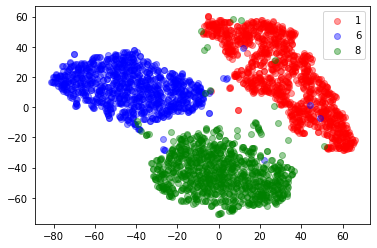

In [13]:
## Plotting
fig, ax = plt.subplots()
for i in range(len(labels)):
    ax.scatter(XTSNE[y == labels[i],0], XTSNE[y == labels[i],1], c=colors[i], label=labels[i], alpha=0.4)
l = ax.legend()

<div class="alert alert-warning">
Question: Try to visualize the projection by choosing different parameter values. What is the advantage of t-SNE over PCA? What is the inconvenient?
    
问题：尝试通过选择不同的参数值来可视化投影。t-SNE 相对于 PCA 的优势是什么？有什么不方便？
</div>

## Impact on supervised model performance  对监督模型性能的影响

In this section, we consider a supervised Machine Learning model to predict the class of an image (which digit it corresponds to). We will study the impact of dimensionality reduction on 3 classifiers which have different mechanisms:
- Naive Bayes Classifier (nb)
- SVM Classifier (svm)
- Random Forest Classifier (rf)

We can give them as features 3 different inputs:
- All the pixel values (raw)
- The n first PCA components (10 for example)
- The 2 dimensions from t-SNE projection (tsne)


在本节中，我们考虑使用监督机器学习模型来预测图像的类别（它对应于哪个数字）。我们将研究降维对具有不同机制的 3 个分类器的影响：

- 朴素贝叶斯分类器 (nb)
- 支持向量机分类器 (svm)
- 随机森林分类器 (rf)
- 我们可以为它们提供 3 个不同的输入作为特征：

所有像素值（原始）
- 第 n 个 PCA 组件（例如 10 个）
- 来自 t-SNE 投影 (tsne) 的 2 个维度

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [15]:
def fit_my_model(model, features, test_size):
    
    ## Building train and test sets from features
    if features == 'raw':
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    elif features == 'tsne':
        X_train, X_test, y_train, y_test = train_test_split(XTSNE, y, test_size=test_size)
    else:
        X_train, X_test, y_train, y_test = train_test_split(XPCA[:,:features], y, test_size=test_size)

    print("Training samples: "+str(X_train.shape[0]))
    print("Testing samples: "+str(X_test.shape[0]))
    print("Number of features: "+str(X_train.shape[1]))
    
    ## Fitting model
    if model == 'nb':
        clf = GaussianNB()
    elif model == 'svm':
        clf = SVC(gamma='auto')
    elif model == 'rf':
        clf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features=np.min([10, X_train.shape[1]]))

    clf.fit(X_train, y_train)
    
    ## Printing scores
    learningScore = clf.score(X_train, y_train)
    generalizationScore = clf.score(X_test, y_test)
    print('Learning score: '+str(learningScore))
    print('Generalization score: '+str(generalizationScore))
    
    return generalizationScore

<div class="alert alert-warning">
Question: Experiment in the cell below by using the function fit_my_model, to check the scores for different configurations
    
问题：在下面的单元格中使用函数 fit_my_model 进行实验，以检查不同配置的分数
</div>

In [16]:
model = 'svm' ## svm, nb, rf
features = 'raw' ## raw, tsne, or Integer corresponding to the n first PCA components
# features = 10
test_size = 0.2

score = fit_my_model(model, features, test_size)
#learning score: score pendant training, c'est un pourcentage....

Training samples: 2453
Testing samples: 614
Number of features: 784
Learning score: 1.0
Generalization score: 0.3811074918566775


<div class="alert alert-warning">
Question: What is the effect of dimensionality reduction on the 3 classifiers? Try to explain why with your intuition...
    
问题：降维对3个分类器有什么影响？试着用你的直觉解释为什么....
</div>

Let's test all the configurations and build a result table with test scores, to help you answer this question.

让我们测试所有配置并构建一个带有测试分数的结果表，以帮助您回答这个问题。

In [17]:
comparison_table = pd.DataFrame(columns = ['raw', 'pca', 'tsne'], index=['svm', 'nb', 'rf'])
for f in comparison_table.columns:
    for m in comparison_table.index:
        print(f + ' - ' + m)
        comparison_table.loc[m,f] = fit_my_model(m, f if f!='pca' else 10, 0.2)

raw - svm
Training samples: 2453
Testing samples: 614
Number of features: 784
Learning score: 1.0
Generalization score: 0.36482084690553745
raw - nb
Training samples: 2453
Testing samples: 614
Number of features: 784
Learning score: 0.9017529555646148
Generalization score: 0.8827361563517915
raw - rf
Training samples: 2453
Testing samples: 614
Number of features: 784
Learning score: 1.0
Generalization score: 0.9837133550488599
pca - svm
Training samples: 2453
Testing samples: 614
Number of features: 10
Learning score: 1.0
Generalization score: 0.4006514657980456
pca - nb
Training samples: 2453
Testing samples: 614
Number of features: 10
Learning score: 0.9523033020790869
Generalization score: 0.9706840390879479
pca - rf
Training samples: 2453
Testing samples: 614
Number of features: 10
Learning score: 1.0
Generalization score: 0.9837133550488599
tsne - svm
Training samples: 2453
Testing samples: 614
Number of features: 2
Learning score: 0.9995923359152059
Generalization score: 0.982084

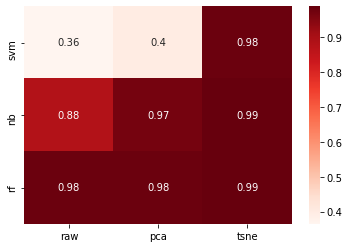

In [18]:
## Heatmap with summarized results
fig = sns.heatmap(comparison_table.astype('float'), annot=True, cmap='Reds')
#横坐标：时间 速度，纵坐标：performance

<div class="alert alert-warning">
Question: What conclusions can you give? If you have time left, you can try with different sets of digits.
</div>

These examples concern supervised classifiers only. Can you imagine the impact on other tasks: regression, clustering, anomaly detection... ?

## Autoencoders

In this section we will build step by step an Autoencoder architecture, train it and evaluate it on MNIST data. First, it will be a standard fully connected autoencoder, then a variational autoencoder in the next section.

To prepare this work, let's import the appropriate libraries and use the full MNIST dataset from Keras, as Neural Networks will need more data for training.

在本节中，我们将逐步构建自动编码器架构，对其进行训练并在 MNIST 数据上对其进行评估。首先，它将是一个标准的全连接自编码器，然后是下一节中的变分自编码器。

为了准备这项工作，让我们导入适当的库并使用来自 Keras 的完整 MNIST 数据集，因为神经网络将需要更多数据进行训练。

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K

In [20]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = np.array([x.flatten() for x in X_train]).astype("float32") / 255.   #像素
X_test = np.array([x.flatten() for x in X_test]).astype("float32") / 255.
print(X_train.shape)
print(X_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 784)
(10000, 784)


In this case we have normalized the pixel values between 0 and 1, to help neural network modelling (sigmoid) and training.

在这种情况下，我们将像素值归一化为 0 和 1 之间，以帮助神经网络建模（sigmoid）和训练。

### Standard Autoencoder  标准自编码器

In this first part, let's implement a standard autoencoder (fully-connected) with 1 hidden layer (200 units, ReLU activation) before the latent space (10 units, ReLU activation). Let's begin with the separate architectures for encoder and decoder. Be careful with the final layer activation!

在第一部分中，让我们在潜在空间（10 个单元，ReLU 激活）之前实现一个标准自动编码器（全连接），其中包含 1 个隐藏层（200 个单元，ReLU 激活）。让我们从编码器和解码器的独立架构开始。小心最后一层激活！

In [21]:
###### CORRECTION ######

# Encoder architecture
encoder_inputs = keras.Input(shape=(784,))
hidden1 = layers.Dense(200, activation="relu")(encoder_inputs)
latent_space = layers.Dense(10, activation="relu")(hidden1)

encoder = keras.Model(encoder_inputs, latent_space, name="encoder")
#######################

In [22]:
###### CORRECTION ######

# Decoder architecture
decoder_inputs = keras.Input(shape=(10,))
hidden2 = layers.Dense(200, activation="relu")(decoder_inputs)
decoder_outputs = layers.Dense(784, activation="sigmoid")(hidden2)

decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")
#######################

Now, we combine them to build the full autoencoder.

现在，我们将它们结合起来构建完整的自动编码器。

In [23]:
# Combining architectures
outputs = decoder(latent_space)
autoencoder = keras.Model(encoder_inputs, outputs, name="autoencoder")

In [24]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
_________________________________________________________________
decoder (Functional)         (None, 784)               159784    
Total params: 318,794
Trainable params: 318,794
Non-trainable params: 0
_________________________________________________________________


Now we need to define the loss function for training. In the case of MNIST images, we can use a pixelwise binary cross-entropy, summed up over the image. We could also use a mean squared error, let's leave it as an exercise.

现在我们需要定义训练的损失函数。在 MNIST 图像的情况下，我们可以使用像素级二进制交叉熵，对图像进行总结。我们也可以使用均方误差，让我们把它留作练习。

In [25]:
# Loss function definition
reconstruction_loss = keras.losses.binary_crossentropy(encoder_inputs, outputs) * 784

autoencoder_loss = K.mean(reconstruction_loss)

In [26]:
# Compiling the model
autoencoder.add_loss(autoencoder_loss)
autoencoder.compile(optimizer="adam")

In [27]:
###### CORRECTION ######

# Fitting the model
history = autoencoder.fit(X_train, X_train,
          epochs=30,
          batch_size=128,
          shuffle=True,
          validation_data=(X_test, X_test))
          
#######################

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 150.5281 - val_loss: 113.7785
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 110.0840 - val_loss: 105.2327
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 104.1325 - val_loss: 101.1106
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 100.8169 - val_loss: 98.6136
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 98.5814 - val_loss: 96.7532
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 96.9799 - val_loss: 95.4259
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 95.8296 - val_loss: 94.2173
Epoch 8/30
469/469 [==============================] - 3s 6ms/step - loss: 94.8827 - val_loss: 93.7939
Epoch 9/30
469/469 [==============================] - 3s 5ms/step - loss: 94.1538 - val_loss: 93.0440
Epoch 10/30
469/469 [==============================] - 3s 6ms/step - loss: 

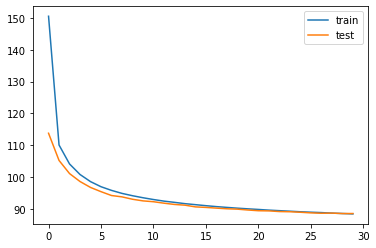

In [28]:
# Visualizing the training and validation losses
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
#结果很好！

We seem to obtain a pretty reasonable training process! Let's visualize the quality of reconstructed images.

我们似乎得到了一个相当合理的训练过程！让我们可视化重建图像的质量。

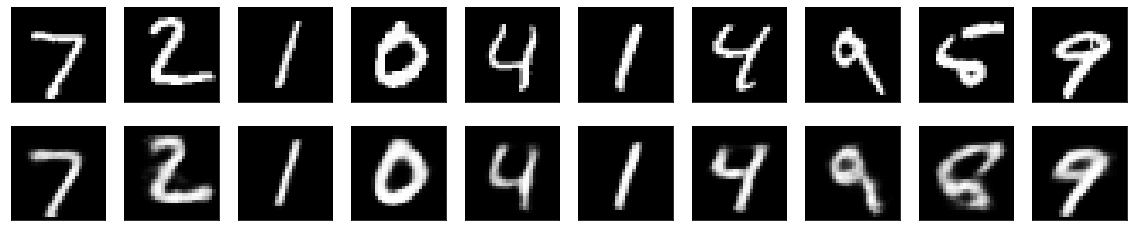

In [30]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original images原图
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images重建之后的图
    ax = plt.subplot(2, n, i + 1 + n)
    encoded_img = encoder.predict(np.array([X_test[i]]).reshape(1,784))
    decoded_img = decoder.predict(encoded_img).reshape(28, 28)
    plt.imshow(decoded_img, cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

We can see that some details are lost, but the global shapes are correctly reconstructed.

我们可以看到丢失了一些细节，但正确地重建了全局形状。

### Variational Autoencoder  变分自编码器

In this second part, let's implement a variational autoencoder. Let's begin by defining the specific layer we will use to sample values from the gaussian distribution defined by the latent space means and standard deviations (z_mean, z_logvar).

在第二部分，让我们实现一个变分自编码器。让我们从定义特定层开始，我们将用于从由潜在空间均值和标准差 (z_mean, z_logvar) 定义的高斯分布中采样值。

In [31]:
###### CORRECTION ######

# Coding the specific sampling layer as a Keras Layer object
class Sampling(layers.Layer):

    def call(self, inputs):
        z_mean, z_logvar = inputs

        nbatch = K.shape(z_mean)[0]
        ndim = K.shape(z_mean)[1]

        std = K.exp(z_logvar)   #variance-> convergence de reseau
        eps = K.random_normal(shape=(nbatch,ndim), mean=0., stddev=0.1)
        
        z = z_mean + eps * std

        return z

#######################

Let's write now the separate encoder and decoder architectures. Be careful, no activation function for mean and logvar computation...

现在让我们编写单独的编码器和解码器架构。小心，没有用于均值和对数变量计算的激活函数......

In [32]:
###### CORRECTION ######

# Encoder architecture
encoder_inputs = keras.Input(shape=(784,))
hidden1 = layers.Dense(200, activation="relu")(encoder_inputs)

z_mean = layers.Dense(10)(hidden1)
z_logvar = layers.Dense(10)(hidden1)

# Sampling
z = Sampling()([z_mean, z_logvar])

encoder = keras.Model(encoder_inputs, z, name="encoder")

#######################

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [33]:
# Decoder architecture
decoder_inputs = keras.Input(shape=(10,))
decoder_hidden = layers.Dense(200, activation="relu")(decoder_inputs)
decoder_outputs = layers.Dense(784, activation="sigmoid")(decoder_hidden)

decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")

Now, we combine them to build the full autoencoder.

现在，我们将它们结合起来构建完整的自动编码器。

In [34]:
# Combining architectures
outputs = decoder(z)
vae = keras.Model(encoder_inputs, outputs, name="vae")

In [35]:
vae.summary()

Model: "vae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 200)          157000      input_3[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 10)           2010        dense_4[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 10)           2010        dense_4[0][0]                    
________________________________________________________________________________________________

Now we need to define the loss function for training. As reconstruction loss, we can still use the pixelwise binary cross-entropy, summed up over the image. In the case of VAE, there is an additional term to the loss: the Kullback-Leibler divergence. Write this new term, using the keras backend functions: K.square, K.exp, K.sum...

现在我们需要定义训练的损失函数。作为重建损失，我们仍然可以使用像素级的二进制交叉熵，在图像上进行总结。在 VAE 的情况下，损失还有一个额外的术语：Kullback-Leibler 背离。使用 keras 后端函数编写这个新术语：K.square、K.exp、K.sum...

In [36]:
###### CORRECTION ######

# Loss function definition
reconstruction_loss = keras.losses.binary_crossentropy(encoder_inputs, outputs) * 784

kl_loss = -0.5 * K.sum(1 + z_logvar - K.square(z_mean) - K.exp(z_logvar))   #comme contraint
#https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence 上有公式

vae_loss = K.mean(reconstruction_loss + kl_loss)

#######################

In [37]:
# Compiling the model
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [38]:
# Fitting the model
history = vae.fit(X_train, X_train,
          epochs=30,
          batch_size=128,
          shuffle=True,
          validation_data=(X_test, X_test))

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 242.7517 - val_loss: 196.2179
Epoch 2/30
469/469 [==============================] - 2s 3ms/step - loss: 188.5710 - val_loss: 181.0602
Epoch 3/30
469/469 [==============================] - 2s 3ms/step - loss: 177.2514 - val_loss: 171.6690
Epoch 4/30
469/469 [==============================] - 2s 3ms/step - loss: 170.5151 - val_loss: 167.6034
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 165.9496 - val_loss: 163.1936
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 162.3750 - val_loss: 160.0859
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 159.7104 - val_loss: 157.4973
Epoch 8/30
469/469 [==============================] - 3s 6ms/step - loss: 157.7136 - val_loss: 155.9039
Epoch 9/30
469/469 [==============================] - 3s 6ms/step - loss: 156.2317 - val_loss: 154.3571
Epoch 10/30
469/469 [==============================] - 3s 6ms/st

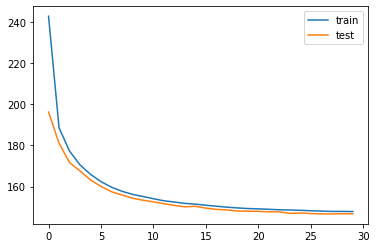

In [39]:
# Visualizing the training and validation losses
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

We seem to obtain a pretty reasonable training process! Let's visualize the quality of reconstructed images.

我们似乎得到了一个相当合理的训练过程！让我们可视化重建图像的质量。

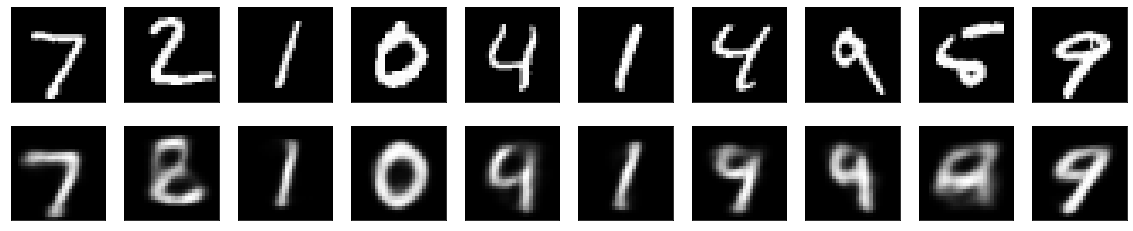

In [40]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    encoded_img = encoder.predict(np.array([X_test[i]]).reshape(1,784))
    decoded_img = decoder.predict(encoded_img).reshape(28, 28)
    plt.imshow(decoded_img, cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

We can see that some details are lost, but the global shapes are correctly reconstructed.

我们可以看到丢失了一些细节，但正确地重建了全局形状。

Since a VAE uses a generative model, we can use the decoder to build fake images, and we can see that the latent space is continuous! Let's sample some random images in a given range of latent space values.

由于 VAE 使用生成模型，我们可以使用解码器来构建假图像，我们可以看到潜在空间是连续的！让我们在给定的潜在空间值范围内对一些随机图像进行采样。

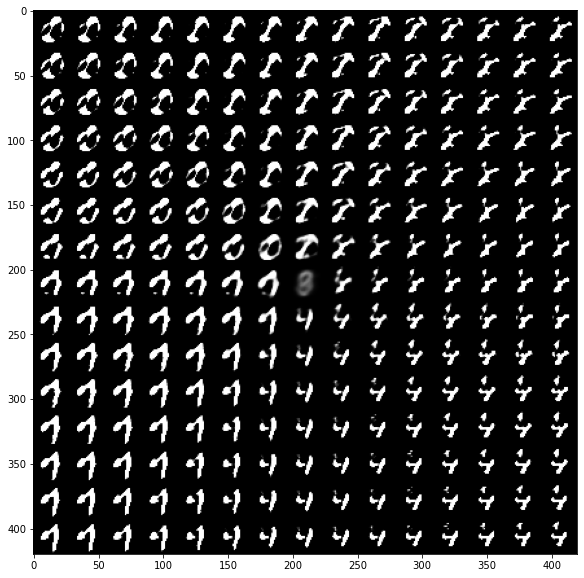

In [44]:
n = 15  # figure with 15x15 generated images
figure = np.zeros((28 * n, 28 * n))

# We sample n images within [-15, 15] standard deviations, around 0 mean
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        
        # We sample the latent space over the 2 first neurons, feel free to change that to other pairs!
        z_sample = np.array([[xi, yi, 0, 0, 0, 0, 0, 0, 0, 0]])
        x_decoded = decoder.predict(z_sample)

        digit = x_decoded[0].reshape(28, 28)
        figure[i * 28: (i + 1) * 28,
               j * 28: (j + 1) * 28] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap="gray")
plt.show()

<div class="alert alert-warning">
Exercise: if you had to detect an abnormal image (for example: not a digit) in this 1D dataset, how would you do?
    
练习：如果你必须在这个一维数据集中检测异常图像（例如：不是数字），你会怎么做？
</div>

Try to introduce a gray-scale 28x28 image of your choice in the dataset (picture of your cat...). Shuffle the dataset, and test your anomaly detection method to find it!
尝试在数据集中引入您选择的灰度 28x28 图像（您的猫的图片...）。打乱数据集，并测试您的异常检测方法以找到它！

<div class="alert alert-warning">
Approach 1: Novelty detection - you already learned normality by training the autoencoder on digits. You can maybe use the reconstruction error as anomaly score with new incoming images! <br/>

方法 1：新颖性检测 - 您已经通过在数字上训练自动编码器学习了正态性。您可以将重建误差用作新传入图像的异常分数！

</div>

<div class="alert alert-warning">
Approach 2: Use the latent space as features - you can apply any known outlier or novelty detection algorithm on the latent space, which is already a good representation of the data.
    
方法2：使用潜在空间作为特征——你可以在潜在空间上应用任何已知的异常值或新颖性检测算法，这已经是数据的一个很好的表示。

</div>

## Conclusion

Always think first about the principles, the intuition, the qualitative aspect behind all the available functions you can find online.

- Many people can chain very complex algorithms together and get results which might be relevant for a problem.
- Only a few can make the right choices to quickly optimize the resolution of a problem and assess its feasability...

始终首先考虑您可以在网上找到的所有可用功能背后的原则、直觉和定性方面。

- 许多人可以将非常复杂的算法链接在一起，并获得可能与问题相关的结果。
- 只有少数人可以做出正确的选择来快速优化问题的解决方案并评估其可行性……